PROYECTO FINAL DATOS MUNDIALES 

In [36]:
# Importar paquetes de Python
!pip install mysql-connector-python
!pip install pymysql

In [37]:
# Se crea un archivo '.env' en la raíz del proyecto. En este archivo, se almacenan las credenciales de base de datos 
# host, usuario, password de mysql y nombre de la base de datos en mysql 

# biblioteca python-dotenv que permite cargar las variables de entorno desde el archivo .env.
!pip install python-dotenv

import mysql.connector
from dotenv import load_dotenv
import os

# Cargar las variables de entorno desde el archivo .env
load_dotenv(dotenv_path='.env')

# Obtener y verificar las credenciales de las variables de entorno
db_host = os.getenv('DB_HOST')
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_name = os.getenv('DB_NAME')

# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()


#  CONSULTA sql - 1) Escribe una consulta para mostrar el nombre y la población de todos los países del continente europeo.
query = "select co.Name,co.Population from proyectofinal.country co WHERE co.Continent = 'Europe'"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# print (results)

# Crear un DataFrame de pandas con los resultados
import pandas as pd
df1 = pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más prolija en Jupyter Notebook
# usando display de IPython
from IPython.display import display
display(df1)



,Name,Population
0,Albania,3401200
1,Andorra,78000
2,Austria,8091800
3,Belgium,10239000
4,Bulgaria,8190900
5,Bosnia and Herzegovina,3972000
6,Belarus,10236000
7,Switzerland,7160400
8,Czech Republic,10278100
9,Germany,82164700


In [38]:
# CONSULTA 2
# Conectar a la base de datos

conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql - 2) Escribe una consulta para mostrar los nombres y las áreas de superficie 
# de los cinco países más grandes del mundo (en términos de área de superficie).
query = "select co.Name, co.SurfaceArea from proyectofinal.country co order by co.SurfaceArea desc limit 5"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df2 = pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más prolija en Jupyter Notebook
# usar display de IPython
from IPython.display import display
display(df2)

,Name,SurfaceArea
0,Russian Federation,17075400.00
1,Antarctica,13120000.00
2,Canada,9970610.00
3,China,9572900.00
4,United States,9363520.00


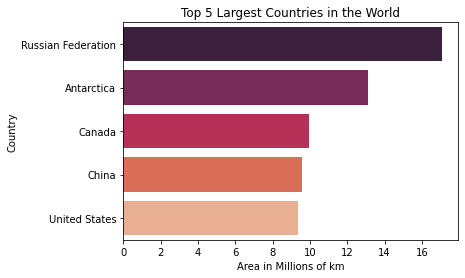

In [39]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt


# para que quede en miles de km.
df2['SurfaceArea'] = df2['SurfaceArea'] / 1000000

# Crear el gráfico de barras horizontales
sns.barplot(data=df2, x='SurfaceArea', y='Name', orient='h', palette='rocket')

# Personalizar el gráfico
plt.title('Top 5 Largest Countries in the World')
plt.xlabel('Area in Millions of km')
plt.ylabel('Country')

# Mostrar el gráfico
plt.show()

In [43]:
# CONSULTA 3
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)
# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql - 3) Escribe una consulta para calcular la población total de todos los países 
# de cada continente y mostrar el resultado junto con el nombre del continente.
query = "select Continent, sum(Population) from proyectofinal.country group by Continent"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df3 = pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más prolija en Jupyter Notebook
# puedes usar display de IPython
from IPython.display import display
display(df3)


,Continent,sum(Population)
0,North America,482993000
1,Asia,3705025700
2,Africa,784475000
3,Europe,730074600
4,South America,345780000
5,Oceania,30401150
6,Antarctica,0


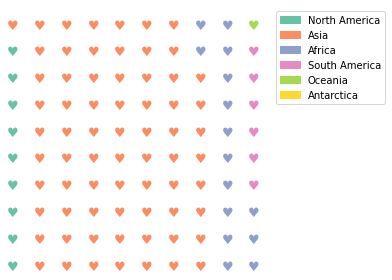

In [44]:
!pip install pywaffle matplotlib
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Datos
value = {'North America': 482993000, 'Asia': 3705025700, 'Africa': 784475000, 'South America': 345780000, 'Oceania': 30401150, 'Antarctica': 0}

# Waffle chart
plt.figure(
    FigureClass = Waffle,
    rows = 10,
    columns = 10,
    values = value,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    characters = '♥')

plt.show()

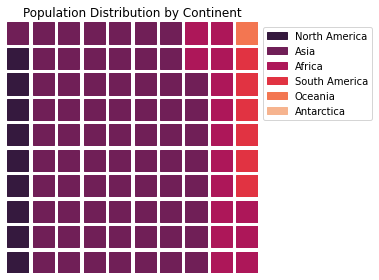

In [45]:
!pip install pywaffle matplotlib
import matplotlib.pyplot as plt
from pywaffle import Waffle

# Datos
value = {'North America': 482993000, 'Asia': 3705025700, 'Africa': 784475000, 
         'South America': 345780000, 'Oceania': 30401150, 'Antarctica': 0}

colors = sns.color_palette("rocket", 6).as_hex()

# Waffle chart
plt.figure(
    FigureClass = Waffle,
    rows = 10,
    columns = 10,
    colors=colors,  # Aplicar la paleta de colores
    values = value,
    legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

plt.title('Population Distribution by Continent')
plt.show()

In [46]:
# CONSULTA 4
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)
# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql - 4) Escribe una consulta para mostrar el nombre de las ciudades y la población 
# de todos los países de Europa, ordenados por población de la ciudad de manera descendente.
query = "select ci.Name, ci.Population, co.Continent from proyectofinal.city ci left join proyectofinal.country co on ci.CountryCode=co.Code WHERE co.Continent = 'Europe' order by ci.Population desc"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df3 = pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más prolija en Jupyter Notebook
# puedes usar display de IPython
from IPython.display import display
display(df3)


,Name,Population,Continent
0,Moscow,8389200,Europe
1,London,7285000,Europe
2,St Petersburg,4694000,Europe
3,Berlin,3386667,Europe
4,Madrid,2879052,Europe
...,...,...,...
836,Serravalle,4802,Europe
837,San Marino,2294,Europe
838,Longyearbyen,1438,Europe
839,Monaco-Ville,1234,Europe


In [47]:
# CONSULTA 5
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

# Definir la consulta de actualización
nueva_poblacion = 1500000000
query = "UPDATE proyectofinal.Country SET Population = %s WHERE Code = %s"

# Ejecutar la consulta con los parámetros
cursor.execute(query, (nueva_poblacion, 'CHN'))

# Confirmar los cambios
conn.commit()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()
print("Actualización completada.")

Actualización completada.


In [48]:
# Verificar el cambio realizado
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql - 5) poblacion china
query = "select Name,Code, Population,Continent from proyectofinal.country where code='CHN'"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df3 = pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df3)

,Name,Code,Population,Continent
0,China,CHN,1500000000,Asia


In [49]:
# Bonus track 1: PAÍS CON MENOR POBLACION DE EUROPA
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select co.Name, co.Population, co.Continent from proyectofinal.country co WHERE co.Continent = 'Europe' order by co.Population ASc limit 1"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df4 = pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df4)

,Name,Population,Continent
0,Holy See (Vatican City State),1000,Europe


In [50]:
# Bonus track 2: ¿CUÁL ES EL PAÍS CON MAYOR CANTIDAD DE LENGUAJES DIFERENTES? ¿CUANTOS SON?
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select cl.CountryCode, co.Name, COUNT(DISTINCT cl.Language) as Cantidad from countrylanguage cl JOIN country co ON cl.CountryCode = co.Code group by cl.CountryCode order by COUNT(DISTINCT cl.Language) desc limit 1"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df5 = pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df5)

,CountryCode,Name,Cantidad
0,CAN,Canada,12


In [13]:
# Bonus track 3: tres países más grandes de Sudamérica en superficie
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select co.Name, co.SurfaceArea, co.Continent from proyectofinal.country co WHERE co.Continent = 'South America' order by co.SurfaceArea DESC limit 3"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df6= pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df6)

,Name,SurfaceArea,Continent
0,Brazil,8547403.00,South America
1,Argentina,2780400.00,South America
2,Peru,1285216.00,South America


In [51]:
# Bonus track 3: tres países más grandes de Sudamérica en población
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select co.Name, co.Population, co.Continent from proyectofinal.country co WHERE co.Continent = 'South America' order by co.Population DESC limit 3"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df7= pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df7)

,Name,Population,Continent
0,Brazil,170115000,South America
1,Colombia,42321000,South America
2,Argentina,37032000,South America


In [52]:
# Bonus track 4: país con mayor expectativa de vida
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)
# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select co.Name, co.LifeExpectancy from proyectofinal.country co order by co.LifeExpectancy desc limit 1"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df8= pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df8)

,Name,LifeExpectancy
0,Andorra,83.5


In [53]:
# Bonus track 4: país con menor expectativa de vida
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select co.Name, co.LifeExpectancy from proyectofinal.country co where co.LifeExpectancy is not null order by co.LifeExpectancy asc limit 1"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df9= pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df9)

,Name,LifeExpectancy
0,Zambia,37.2


In [17]:
# Bonus track 5: los 3 países más jóvenes del mundo
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select co.Name, co.IndepYear from proyectofinal.country co where co.IndepYear is not null order by co.IndepYear desc limit 3"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df10= pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df10)

,Name,IndepYear
0,Palau,1994
1,Czech Republic,1993
2,Eritrea,1993


In [54]:
# Bonus track 6: Expectativa promedio de vida por continente
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select co.Continent, AVG(co.LifeExpectancy) as Average from proyectofinal.country co where co.LifeExpectancy is not null group by co.Continent order by Average desc"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df11= pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df11)

,Continent,Average
0,Europe,75.14773
1,North America,72.99189
2,South America,70.94615
3,Oceania,69.71500
4,Asia,67.44118
5,Africa,52.57193


In [19]:
# Bonus track 7: Expectativa promedio de vida en Sudaamérica
# Conectar a la base de datos
conn = mysql.connector.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name,
)

# Crear un cursor
cursor = conn.cursor()

#  CONSULTA sql 
query = "select co.Name, AVG(co.LifeExpectancy) as Average from proyectofinal.country co where co.LifeExpectancy is not null and co.Continent = 'South America' group by co.Name order by Average desc"
cursor.execute(query)

# Obtener los nombres de las columnas
columns = [column[0] for column in cursor.description]

# Obtener los resultados de la consulta
results = cursor.fetchall()

# Cerrar el cursor y la conexión
cursor.close()
conn.close()

# Crear un DataFrame de pandas con los resultados
df12= pd.DataFrame(results, columns=columns)

# Para mostrarlo como una tabla más elegante en Jupyter Notebook o similar
# puedes usar display de IPython
from IPython.display import display
display(df12)

,Name,Average
0,French Guiana,76.10000
1,Chile,75.70000
2,Uruguay,75.20000
3,Argentina,75.10000
4,Paraguay,73.70000
5,Venezuela,73.10000
6,Suriname,71.40000
7,Ecuador,71.10000
8,Colombia,70.30000
9,Peru,70.00000
